In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import torch
import torchvision.transforms as transforms
from scipy.io import loadmat
import random
np.random.seed(23)

# Load MNIST dataset
mnist = loadmat("/mnist-original.mat")
images = mnist["data"].T
labels = mnist["label"][0].astype(int)

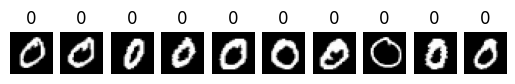

In [ ]:

# Explore the first 10 images and their corresponding labels
for i in range(10):
    image = images[i].reshape(28, 28)
    label = labels[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(str(label))

plt.show()

In [ ]:
# Data Preprocessing
# Flatten the images into 1D arrays
flat_images = images.reshape(-1, 28*28).astype(float)/ 255.0

# Normalize the pixel values to a range between 0 and 1
normalized_images = (flat_images - flat_images.min())/ (flat_images.max() - flat_images.min())

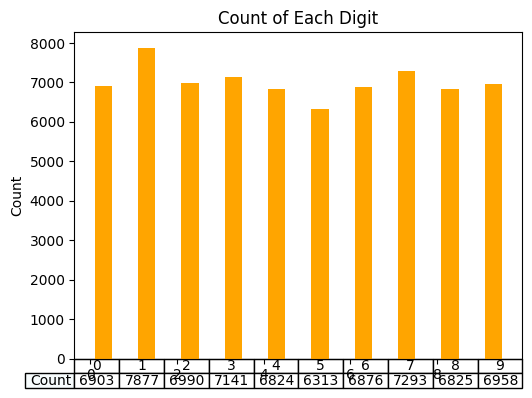

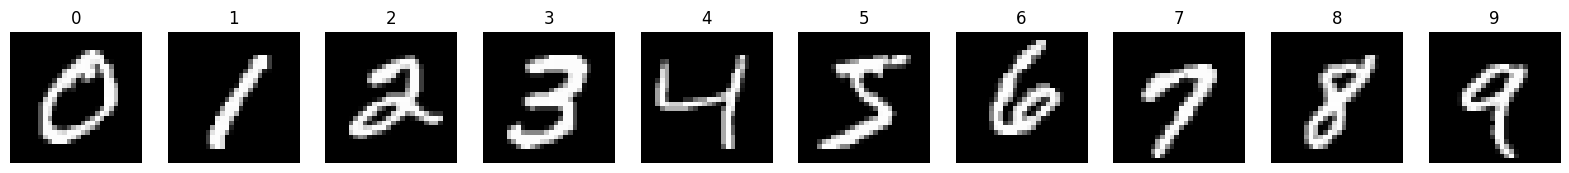

In [ ]:
# Descriptive Statistics
# Calculate and display the distribution of labels
unique_digits, counts = np.unique(labels, return_counts=True)

columns = [str(digit) for digit in unique_digits]
rows = [f'Count']

# Create a 1x9 table for counts of each digit
data = [counts]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Set the row color to orange
row_colors = ['orange'] * len(rows)

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=row_colors)
    y_offset = y_offset + data[row]
    cell_text.append(['%d' % x for x in y_offset])

# Add a table at the bottom of the axes
plt.table(cellText=cell_text,
          rowLabels=rows,
          rowColours=colors,
          colLabels=columns,
          loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Count")
plt.title('Count of Each Digit')

unique_digits, first_indices = np.unique(labels, return_index=True)

# Print the first occurrence of each digit
plt.figure(figsize=(20, 2))

for i in range(10):
    first_index = first_indices[i]
    image = images[first_index].reshape(28, 28)
    label = labels[first_index]

    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(str(int(label)))

plt.show()

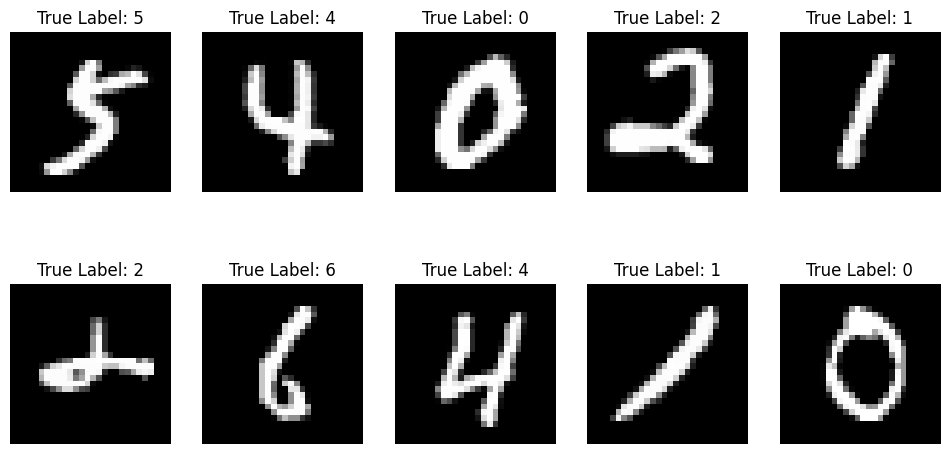

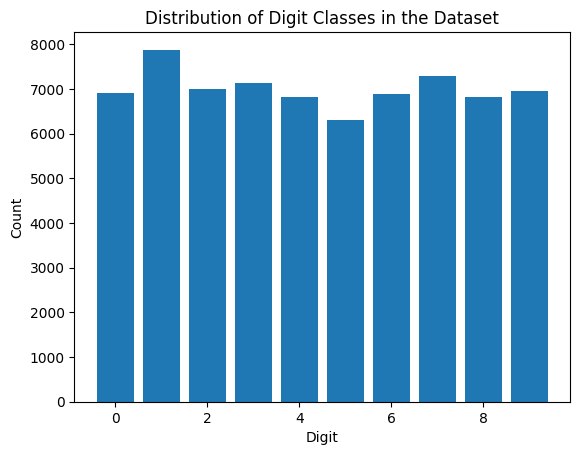

In [ ]:
# Display a random sample of 10 images along with their true labels
sample_indices = random.sample(range(len(labels)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, idx in enumerate(sample_indices):
    image = images[idx].reshape(28, 28)
    label = labels[idx].item()
    axes[i // 5, i % 5].imshow(image, cmap='gray')
    axes[i // 5, i % 5].axis('off')
    axes[i // 5, i % 5].set_title(f'True Label: {label}')

plt.show()

# Create a bar chart illustrating the distribution of digit classes in the dataset
label_counts = torch.bincount(torch.from_numpy(labels))
labels_new = torch.arange(10)

plt.bar(labels_new, label_counts[labels_new])
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digit Classes in the Dataset')
plt.show()

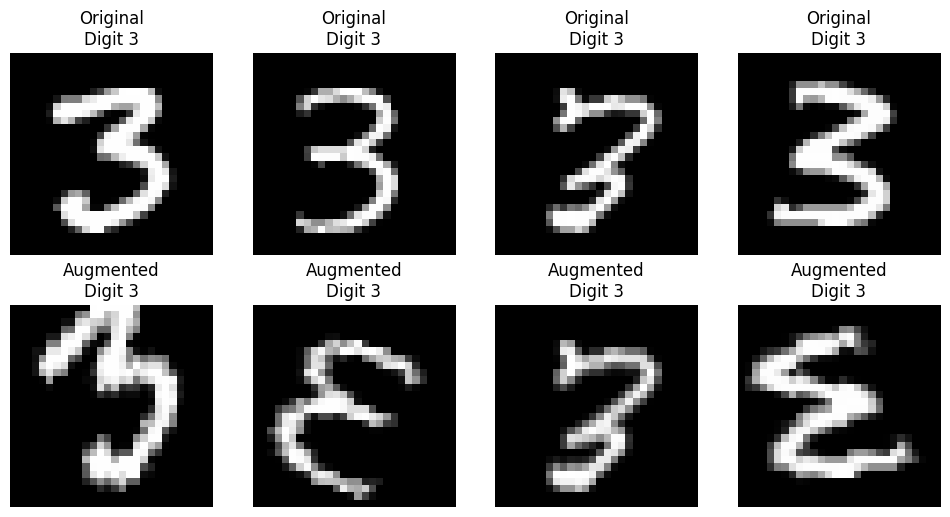

In [ ]:
# Image Preprocessing: Apply image augmentation techniques
augmentation_transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.RandomRotation(degrees=(-30, 30)),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Visualize original and augmented images for a specific digi
digit_3_indices = (labels == 3).nonzero()[0]
sample_digit_3_indices = random.sample(digit_3_indices.tolist(), 4)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, idx in enumerate(sample_digit_3_indices):
    original_image = images[idx].reshape(28, 28)
    augmented_image = augmentation_transform(original_image).numpy()

    axes[0, i].imshow(original_image, cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original\nDigit 3')

    axes[1, i].imshow(augmented_image.squeeze(), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Augmented\nDigit 3')

plt.show()